In [10]:
import reciprocalspaceship as rs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib ### for grabbing version; comment out for efficiency
import numpy as np
import scipy.spatial as sp
import scipy ### for grabbing version; comment out for efficiency
import glob
import pandas as pd

%matplotlib inline

In [12]:
### document version of libraries used

print("reciprocalspaceship version: {}".format(rs.__version__))
print("seaborn version: {}".format(sns.__version__))
print("matplotlib version: {}".format(matplotlib.__version__))
print("numpy version: {}".format(np.__version__))
print("scipy version: {}".format(scipy.__version__))
print("pandas version: {}".format(pd.__version__))

reciprocalspaceship version: 0.9.5
seaborn version: 0.11.1
matplotlib version: 3.3.2
numpy version: 1.19.2
scipy version: 1.5.2
pandas version: 1.1.5


In [21]:
files = glob.glob("./diff_maps_refinedPHI/*.mtz")

In [22]:
files

['./diff_maps_refinedPHI/F_internal_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_control_200us_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/lys_simulated_1.2Bfac_diffmap_W0-05.mtz',
 './diff_maps_refinedPHI/F_internal_200us_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_control_chito_20ns_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_control_20ns_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_control_20us_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_control_chito_200us_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_chito_200us_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_20us_540uJ_extrapmap_W0-05_N1.mtz',
 './diff_maps_refinedPHI/F_internal_20ns_540uJ_extrapmap_W0-05_N1.mtz']

In [46]:
def filename_cleanup_list(file_list_in):
    names_cleanup_0 = [file.replace("./diff_maps_refinedPHI/","") for file in file_list_in]
    names_cleanup_1 = [file.replace("F_internal_","") for file in names_cleanup_0]
    names_cleanup_2 = [file.replace("_diffmap_W0-05.mtz","") for file in names_cleanup_1]
    names_cleanup_3 = [file.replace("_540uJ_extrapmap_W0-05_N1.mtz","") for file in names_cleanup_2]
    names_cleanup_4 = [file.replace("chito","CHI") for file in names_cleanup_3]
    names_cleanup_5 = [file.replace("control","CTRL") for file in names_cleanup_4]
    file_list_out = [file.replace("lys_simulated","SIM") for file in names_cleanup_5]
    return file_list_out

def filename_cleanup(file):
    name_cleanup_0 = file.replace("./diff_maps_refinedPHI/","")
    name_cleanup_1 = name_cleanup_0.replace("F_internal_","")
    name_cleanup_2 = name_cleanup_1.replace("_diffmap_W0-05.mtz","")
    name_cleanup_3 = name_cleanup_2.replace("_540uJ_extrapmap_W0-05_N1.mtz","")
    name_cleanup_4 = name_cleanup_3.replace("chito","CHI")
    name_cleanup_5 = name_cleanup_4.replace("control","CTRL")
    file_out = name_cleanup_5.replace("lys_simulated","SIM")
    return file_out

In [47]:
names = filename_cleanup_list(files)
names.sort()

In [48]:
names

['200us',
 '20ns',
 '20us',
 'CHI_200us',
 'CHI_20ns',
 'CTRL_200us',
 'CTRL_20ns',
 'CTRL_20us',
 'CTRL_CHI_200us',
 'CTRL_CHI_20ns',
 'SIM_1.2Bfac']

In [49]:
names.insert(2, names.pop(0))
names.insert(4, names.pop(3))
names.insert(7, names.pop(5))
names.insert(9, names.pop(8))
names

['20ns',
 '20us',
 '200us',
 'CHI_20ns',
 'CHI_200us',
 'CTRL_20ns',
 'CTRL_20us',
 'CTRL_200us',
 'CTRL_CHI_20ns',
 'CTRL_CHI_200us',
 'SIM_1.2Bfac']

In [50]:
### 0.04 e/A conversion values pulled manually from Coot session

volume_to_sigma = {
 '20ns': 1.91,
 '20us': 2.99,
 '200us': 2.67,
 'CHI_20ns': 1.8,
 'CHI_200us': 1.79,
 'CTRL_20ns': 3.93,
 'CTRL_20us': 3.87,
 'CTRL_200us': 3.34,
 'CTRL_CHI_20ns': 3.65,
 'CTRL_CHI_200us': 3.67,
 'SIM_1.2Bfac': 1.92}

In [53]:
df = pd.DataFrame(index=names, columns=names)

In [54]:
df

,20ns,20us,200us,CHI_20ns,CHI_200us,CTRL_20ns,CTRL_20us,CTRL_200us,CTRL_CHI_20ns,CTRL_CHI_200us,SIM_1.2Bfac
20ns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHI_20ns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHI_200us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTRL_20ns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTRL_20us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTRL_200us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTRL_CHI_20ns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTRL_CHI_200us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
def CC_calculator(file_one, file_two, threshold_dict, df_out):
    name_one = filename_cleanup(file_one)
    name_two = filename_cleanup(file_two)
    mtz_one = rs.read_mtz(file_one)
    mtz_two = rs.read_mtz(file_two)
    mtz_one.compute_dHKL(inplace=True)
    grid_sampling = 0.25
    a_sampling = int(mtz_one.cell.a/(mtz_one.dHKL.min()*grid_sampling))
    b_sampling = int(mtz_one.cell.b/(mtz_one.dHKL.min()*grid_sampling))
    c_sampling = int(mtz_one.cell.c/(mtz_one.dHKL.min()*grid_sampling))
    mtz_one["sf"] = mtz_one.to_structurefactor("WDF", "PHIFMODEL")
    mtz_two["sf"] = mtz_two.to_structurefactor("WDF", "PHIFMODEL")
    reciprocalgrid_one = mtz_one.to_reciprocalgrid("sf", gridsize=(a_sampling, b_sampling, c_sampling))
    reciprocalgrid_two = mtz_two.to_reciprocalgrid("sf", gridsize=(a_sampling, b_sampling, c_sampling))
    realmap_one = np.real(np.fft.fftn(reciprocalgrid_one))
    realmap_two = np.real(np.fft.fftn(reciprocalgrid_two))
    realmap_one_thresh = np.copy(realmap_one)
    realmap_two_thresh = np.copy(realmap_two)
    realmap_one_thresh[np.logical_and(realmap_one_thresh>=realmap_one_thresh.std()*-threshold_dict[name_one], realmap_one_thresh<=realmap_one_thresh.std()*threshold_dict[name_one])]=0
    realmap_two_thresh[np.logical_and(realmap_two_thresh>=realmap_two_thresh.std()*-threshold_dict[name_two], realmap_two_thresh<=realmap_two_thresh.std()*threshold_dict[name_two])]=0
    cc = np.corrcoef(realmap_one_thresh.flatten(), realmap_two_thresh.flatten())[0][1]
    df_out[name_one][name_two] = cc
    print("CC: {} vs {} = {}".format(name_one, name_two, cc))


In [57]:
for file_one in files:
    for file_two in files:
        CC_calculator(file_one, file_two, volume_to_sigma, df)


CC: CHI_20ns vs CHI_20ns = 0.9999999999999999
CC: CHI_20ns vs CTRL_200us = -0.04055942676809664
CC: CHI_20ns vs SIM_1.2Bfac = 0.44526915456103605
CC: CHI_20ns vs 200us = 0.29613203765942925
CC: CHI_20ns vs CTRL_CHI_20ns = 0.015479547105316144
CC: CHI_20ns vs CTRL_20ns = -0.00025734331988600635
CC: CHI_20ns vs CTRL_20us = 0.000857940827031409
CC: CHI_20ns vs CTRL_CHI_200us = -0.0025928607536137584
CC: CHI_20ns vs CHI_200us = 0.44526143364652637
CC: CHI_20ns vs 20us = 0.30747763772400916
CC: CHI_20ns vs 20ns = 0.5116497750151283
CC: CTRL_200us vs CHI_20ns = -0.042267170833232934
CC: CTRL_200us vs CTRL_200us = 1.0
CC: CTRL_200us vs SIM_1.2Bfac = -0.06023458537127027
CC: CTRL_200us vs 200us = 0.0033055092106697276
CC: CTRL_200us vs CTRL_CHI_20ns = 0.0011752536411404392
CC: CTRL_200us vs CTRL_20ns = -0.001032325324102673
CC: CTRL_200us vs CTRL_20us = 0.0010741823442771998
CC: CTRL_200us vs CTRL_CHI_200us = 0.0018610261185576374
CC: CTRL_200us vs CHI_200us = -0.018136248555733942
CC: CTRL_20

In [58]:
df

,20ns,20us,200us,CHI_20ns,CHI_200us,CTRL_20ns,CTRL_20us,CTRL_200us,CTRL_CHI_20ns,CTRL_CHI_200us,SIM_1.2Bfac
20ns,1,0.363674,0.369784,0.51165,0.243137,0.0164767,0.00292319,-0.0534649,-0.00495037,-0.00123159,0.672451
20us,0.363674,1,0.27399,0.307478,0.220095,-0.000323105,0.0219992,-0.0359842,-0.0065274,-0.00392196,0.328815
200us,0.369784,0.27399,1,0.296132,0.182444,-0.00106473,0.0030117,0.00330551,-0.00531758,0.000860431,0.368047
CHI_20ns,0.512103,0.309874,0.29484,1,0.444048,0.000905971,0.00279346,-0.0422672,0.0154795,-0.00262466,0.446105
CHI_200us,0.244055,0.220234,0.181292,0.445261,1,-0.000727706,0.00171689,-0.0181362,-0.00308823,0.0178994,0.195791
CTRL_20ns,0.0164767,-0.000323105,-0.00106473,-0.000257343,-0.000495717,1,-3.06811e-06,-0.00103233,-0.00205061,0.000977814,0.000548348
CTRL_20us,0.00292319,0.0219992,0.0030117,0.000857941,0.00243,-3.06811e-06,1,0.00107418,-0.00186874,-0.000463033,0.000498466
CTRL_200us,-0.051011,-0.0328112,0.0045012,-0.0405594,-0.017284,-0.0018264,0.00152005,1,0.00180369,4.8461e-05,-0.057494
CTRL_CHI_20ns,-0.00337146,-0.00501313,-0.00159554,0.0154795,-0.00277441,-0.00219912,-0.000471236,0.00117525,1,0.000676423,-0.00230066
CTRL_CHI_200us,-0.000988344,-0.00418854,0.000933007,-0.00259286,0.0178994,0.000982864,-0.000491022,0.00186103,-4.95754e-05,1,0.00182621


<AxesSubplot:>

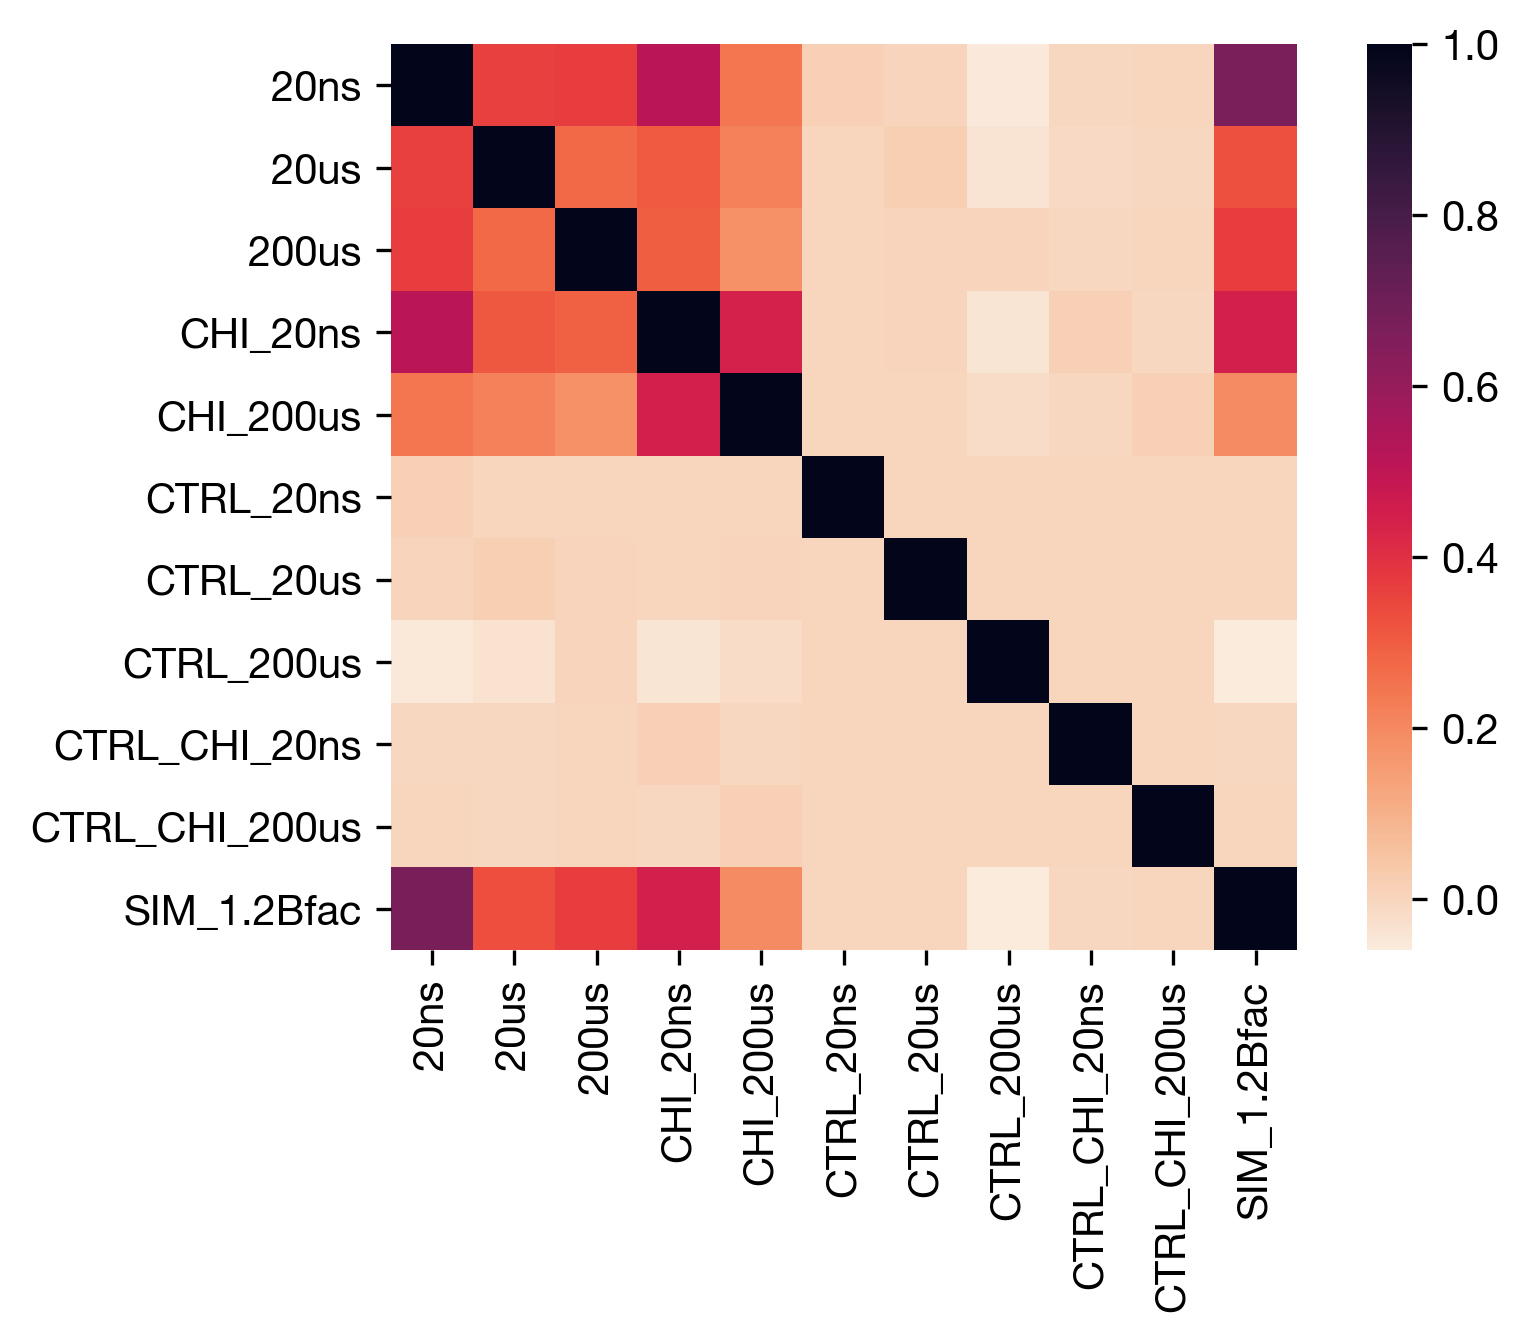

In [61]:
plt.figure(dpi=300)
plt.rcParams.update({'font.sans-serif':'Helvetica Neue'})
sns.heatmap(df.astype(float), cmap='rocket_r', square=True)

<AxesSubplot:title={'center':'Weighted Difference-Map CC'}>

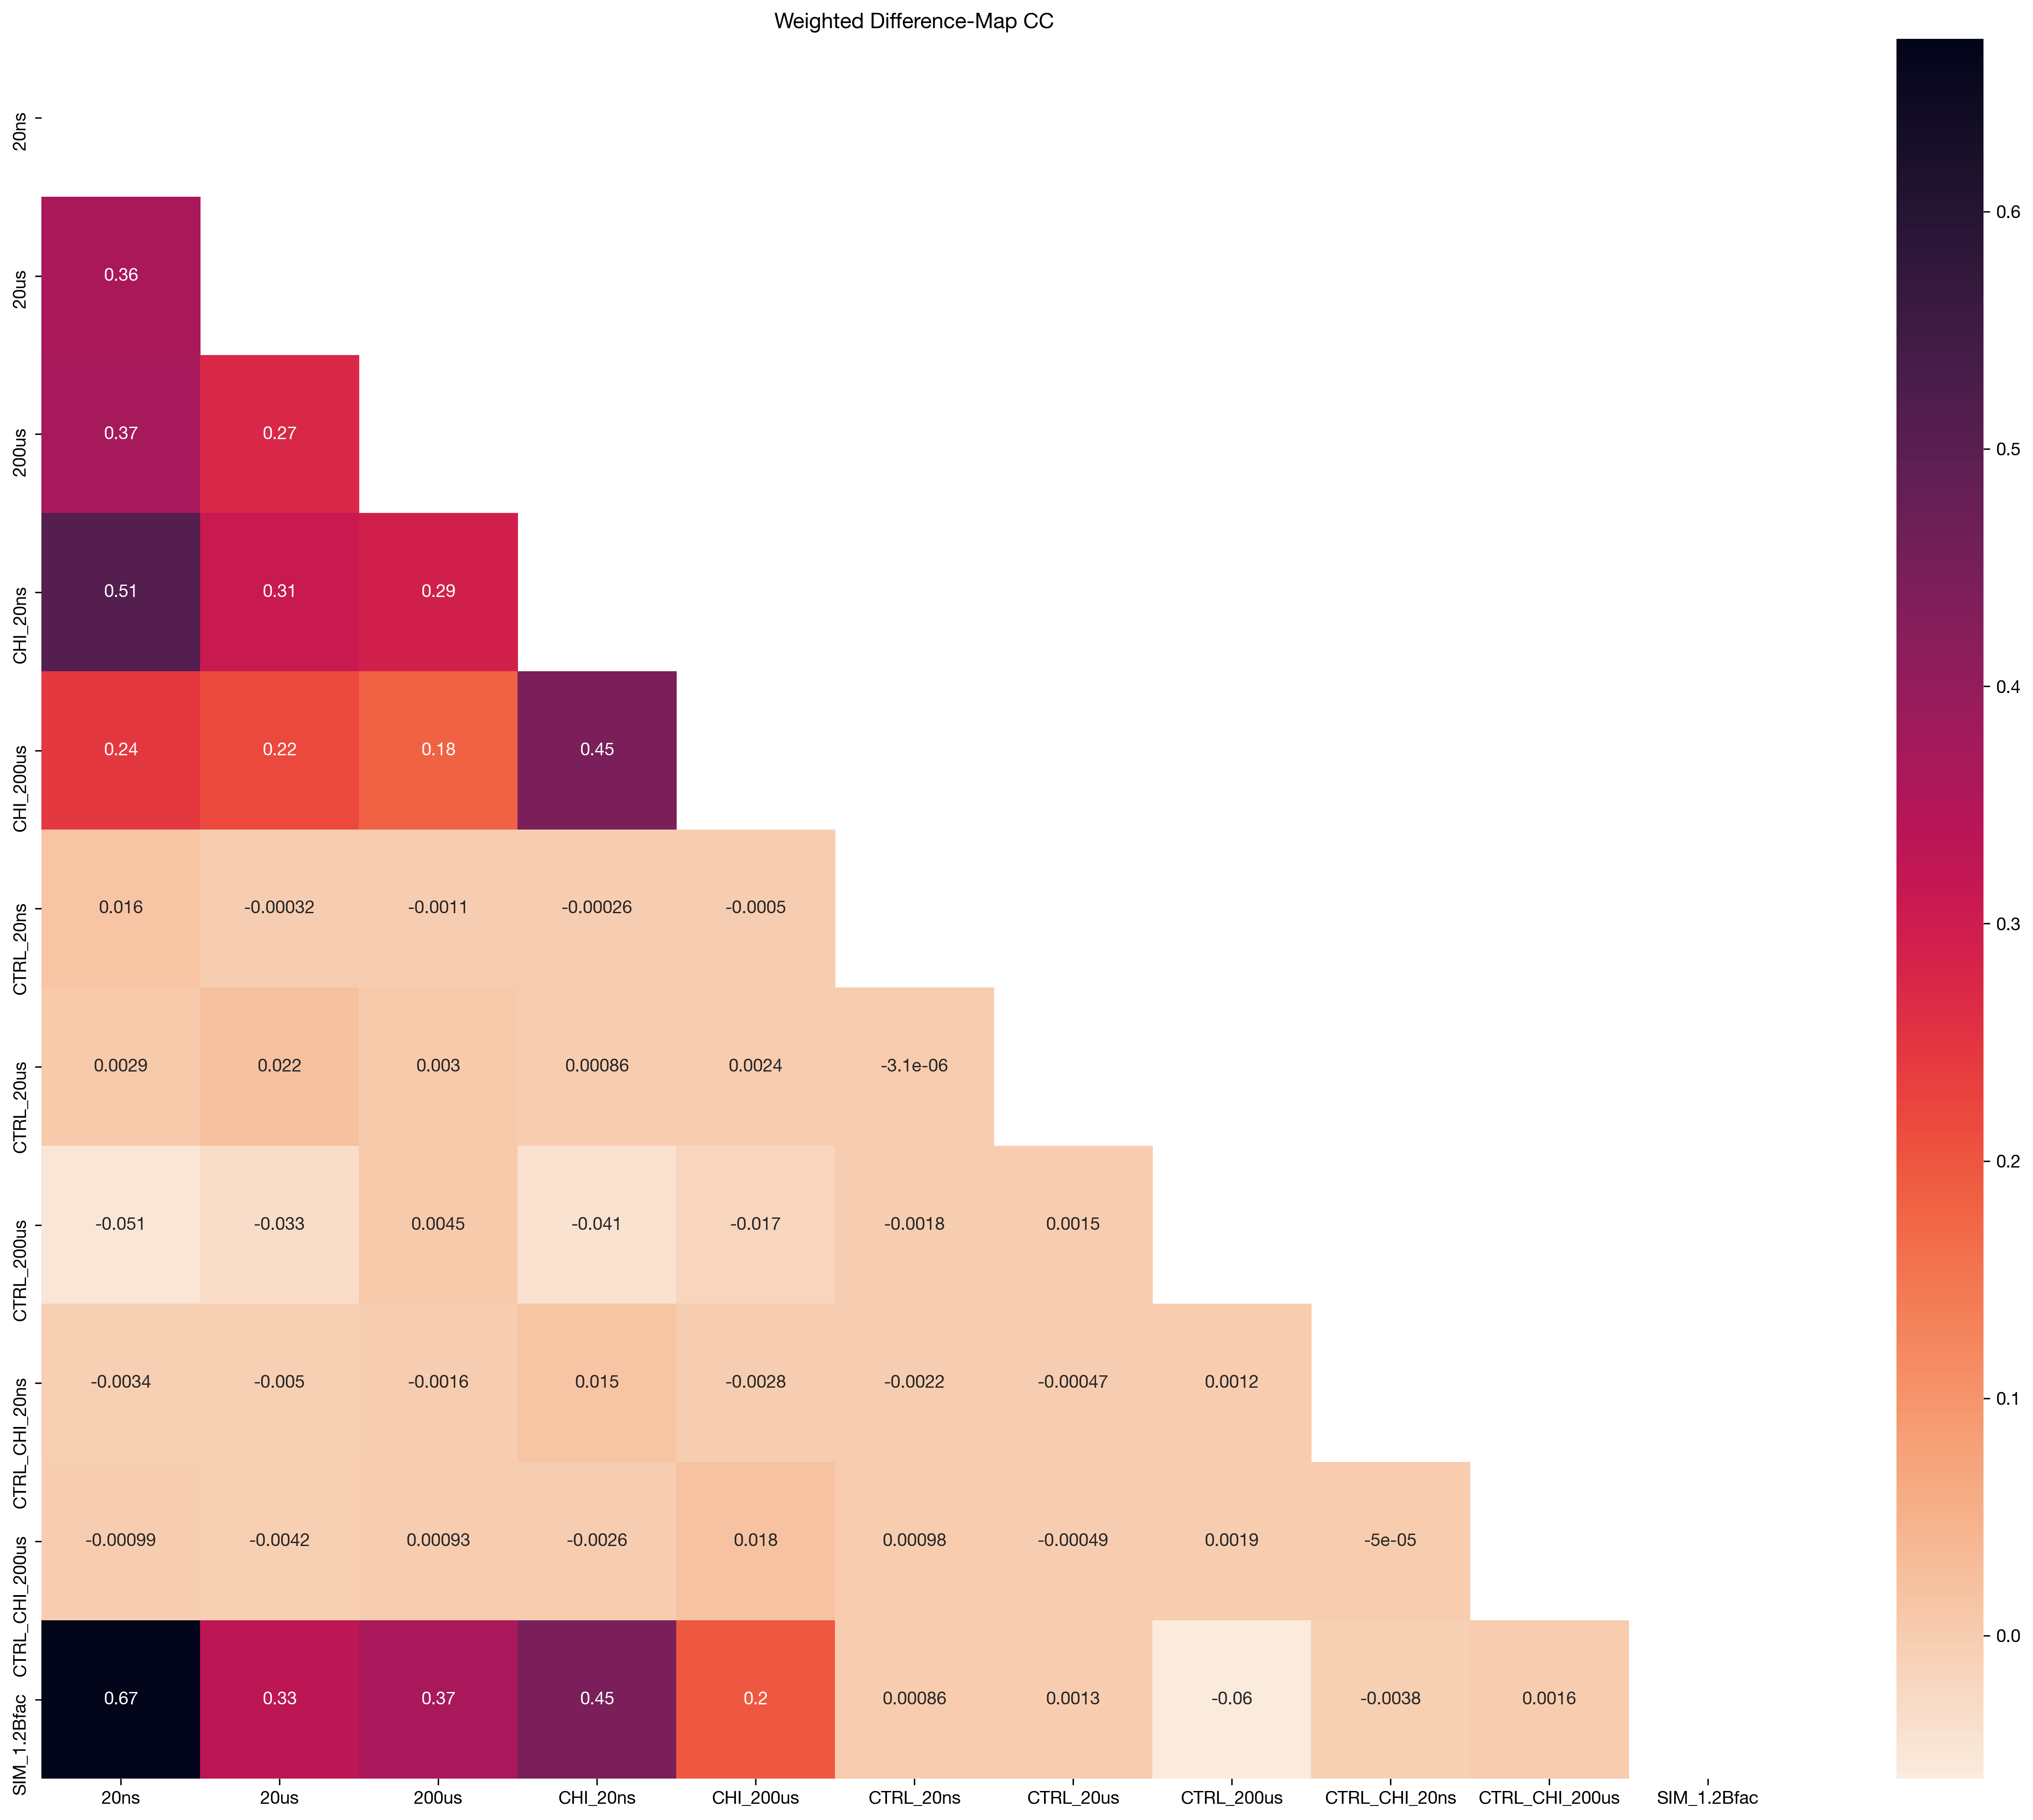

In [62]:
mask_ut=np.triu(np.ones(df.astype(float).shape)).astype(np.bool)
plt.figure(figsize=(22,18), dpi=300)
plt.title("Weighted Difference-Map CC")
sns.heatmap(df.astype(float), cmap='rocket_r', mask=mask_ut, annot=True)